# Module B: Eigenvalues, Eigenstates, and Measurement

## The Measurement Postulate

In quantum mechanics, measurement is fundamentally probabilistic:

### Key Ideas

1. **Observable** $\hat{A}$ has eigenstates $|a_n\rangle$ with eigenvalues $a_n$:
   $$\hat{A}|a_n\rangle = a_n|a_n\rangle$$

2. **Measurement outcome**: Always an eigenvalue $a_n$

3. **Probability**: $P(a_n) = |\langle a_n|\psi\rangle|^2$

4. **Post-measurement state**: Collapses to $|a_n\rangle$

### Why Eigenvalues?

- Eigenvalues = possible measurement results
- Eigenstates = states with definite values

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
# ============================================================
# HELPER FUNCTIONS (from Module A)
# ============================================================

def normalize(psi):
    """Normalize a quantum state."""
    norm = np.sqrt(np.vdot(psi, psi))
    return psi / norm

def inner_product(phi, psi):
    """Compute ⟨φ|ψ⟩."""
    return np.vdot(phi, psi)

# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

## Finding Eigenvalues and Eigenstates

### NumPy's eigh Function

`numpy.linalg.eigh(A)` solves $A|v\rangle = \lambda|v\rangle$ for Hermitian matrices.

Returns:
- `eigenvalues`: Array of eigenvalues (sorted ascending)
- `eigenvectors`: Matrix where column $i$ is eigenvector for eigenvalue $i$

In [4]:
def get_eigensystem(A):
    """
    Get eigenvalues and eigenvectors of a Hermitian operator.
    
    Parameters:
    -----------
    A : ndarray
        Hermitian matrix (observable)
        
    Returns:
    --------
    eigenvalues : ndarray
        Possible measurement outcomes
    eigenstates : list of ndarray
        Corresponding eigenstates (normalized)
    """
    # eigh is for Hermitian matrices (guaranteed real eigenvalues)
    eigenvalues, eigenvectors = np.linalg.eigh(A)
    
    # Extract individual eigenstates as a list
    eigenstates = [eigenvectors[:, i] for i in range(len(eigenvalues))]
    
    return eigenvalues, eigenstates

In [5]:
# Example: Eigensystem of σ_z
print("Eigensystem of σz (Spin along z-axis):")
print("="*50)

evals_z, evecs_z = get_eigensystem(sigma_z)

for i, (val, vec) in enumerate(zip(evals_z, evecs_z)):
    print(f"\nEigenvalue λ_{i} = {val:+.0f}")
    print(f"Eigenstate |a_{i}⟩ = {vec}")

print("\n" + "="*50)
print("Physical interpretation:")
print("  λ = +1 → Spin up |↑⟩")
print("  λ = -1 → Spin down |↓⟩")

Eigensystem of σz (Spin along z-axis):

Eigenvalue λ_0 = -1
Eigenstate |a_0⟩ = [0.+0.j 1.+0.j]

Eigenvalue λ_1 = +1
Eigenstate |a_1⟩ = [1.+0.j 0.+0.j]

Physical interpretation:
  λ = +1 → Spin up |↑⟩
  λ = -1 → Spin down |↓⟩


In [8]:
# Compare eigenstates of σ_x
print("Eigensystem of σx (Spin along x-axis):")
print("="*50)

evals_x, evecs_x = get_eigensystem(sigma_x)

for i, (val, vec) in enumerate(zip(evals_x, evecs_x)):
    print(f"\nEigenvalue λ_{i} = {val:+.0f}")

    # Force conventional phase
    if vec[0].real < 0:  # If first component negative
        vec = -vec        # Flip entire vector
    print(f"Eigenstate = {vec}")
    print(f"  = (|↑⟩ {'+' if vec[1].real > 0 else '-'} |↓⟩)/√2")

Eigensystem of σx (Spin along x-axis):

Eigenvalue λ_0 = -1
Eigenstate = [ 0.70710678-0.j -0.70710678-0.j]
  = (|↑⟩ - |↓⟩)/√2

Eigenvalue λ_1 = +1
Eigenstate = [0.70710678+0.j 0.70710678+0.j]
  = (|↑⟩ + |↓⟩)/√2


## Computing Measurement Probabilities

### The Born Rule

Given state $|\psi\rangle$ and eigenstates $\{|a_n\rangle\}$ of observable $\hat{A}$:

$$P(a_n) = |\langle a_n|\psi\rangle|^2$$

This is the probability of measuring outcome $a_n$.

In [9]:
def measurement_probabilities(psi, A):
    """
    Compute probabilities for each measurement outcome.
    
    Parameters:
    -----------
    psi : ndarray
        Quantum state (normalized)
    A : ndarray
        Observable (Hermitian matrix)
        
    Returns:
    --------
    eigenvalues : ndarray
        Possible outcomes
    probabilities : ndarray
        P(outcome) for each eigenvalue
    """
    eigenvalues, eigenstates = get_eigensystem(A)
    
    # P(aₙ) = |⟨aₙ|ψ⟩|²
    probabilities = np.array([np.abs(inner_product(evec, psi))**2 
                               for evec in eigenstates])
    
    return eigenvalues, probabilities

In [10]:
# Example: Measure σz on various states
states = {
    '|↑⟩': np.array([1, 0], dtype=complex),
    '|↓⟩': np.array([0, 1], dtype=complex),
    '|+⟩': normalize(np.array([1, 1], dtype=complex)),
    '|R⟩': normalize(np.array([1, 1j], dtype=complex)),
}

print("Measurement Probabilities for σz:")
print("="*50)
print(f"{'State':^10} {'P(+1)':^15} {'P(-1)':^15}")
print("-"*50)

for name, psi in states.items():
    evals, probs = measurement_probabilities(psi, sigma_z)
    print(f"{name:^10} {probs[1]:^15.3f} {probs[0]:^15.3f}")

Measurement Probabilities for σz:
  State         P(+1)           P(-1)     
--------------------------------------------------
   |↑⟩          1.000           0.000     
   |↓⟩          0.000           1.000     
   |+⟩          0.500           0.500     
   |R⟩          0.500           0.500     


## Visualizing Measurement Probabilities

### Bar Plot of Probabilities

We plot $P(a_n)$ for each eigenvalue to visualize:
- Which outcomes are certain (P=1)
- Which are impossible (P=0)
- Superpositions (0 < P < 1)

In [11]:
def plot_measurement_probs(psi, A, observable_name="A", eigenvalue_labels=None):
    """
    Plot measurement probabilities as a bar chart.
    """
    eigenvalues, probs = measurement_probabilities(psi, A)
    
    if eigenvalue_labels is None:
        eigenvalue_labels = [f'{ev:.1f}' for ev in eigenvalues]
    
    fig, ax = plt.subplots(figsize=(8, 5))
    bars = ax.bar(eigenvalue_labels, probs, color='steelblue', alpha=0.8, edgecolor='navy')
    
    ax.set_xlabel(f'Eigenvalue of {observable_name}')
    ax.set_ylabel('Probability')
    ax.set_title(f'Measurement Probabilities for {observable_name}')
    ax.set_ylim(0, 1.1)
    ax.grid(True, alpha=0.3)
    
    # Label bars
    for bar, p in zip(bars, probs):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.03,
                f'{p:.2f}', ha='center', va='bottom', fontsize=12)
    
    plt.tight_layout()
    plt.show()

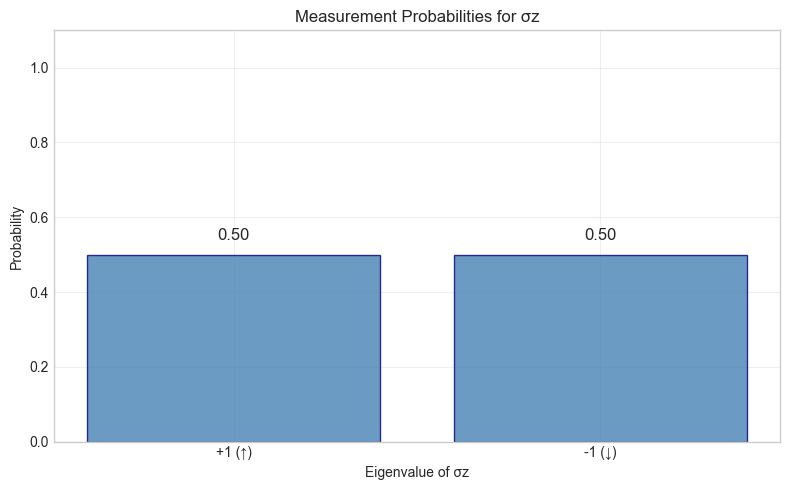

In [12]:
# |+⟩ state measured in σz basis
plus = normalize(np.array([1, 1], dtype=complex))
plot_measurement_probs(plus, sigma_z, "σz", ["+1 (↑)", "-1 (↓)"])

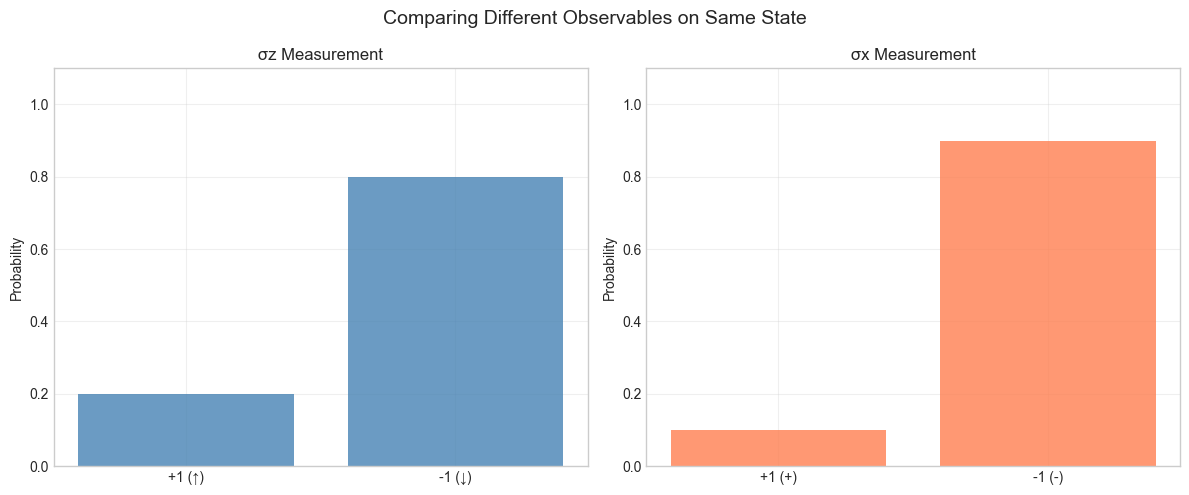

In [13]:
# Compare σz vs σx for the same state
psi = normalize(np.array([1, 0.5], dtype=complex))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# σz probabilities
evals_z, probs_z = measurement_probabilities(psi, sigma_z)
ax1.bar(["+1 (↑)", "-1 (↓)"], probs_z, color='steelblue', alpha=0.8)
ax1.set_ylabel('Probability')
ax1.set_title('σz Measurement')
ax1.set_ylim(0, 1.1)
ax1.grid(True, alpha=0.3)

# σx probabilities
evals_x, probs_x = measurement_probabilities(psi, sigma_x)
ax2.bar(["+1 (+)", "-1 (-)"], probs_x, color='coral', alpha=0.8)
ax2.set_ylabel('Probability')
ax2.set_title('σx Measurement')
ax2.set_ylim(0, 1.1)
ax2.grid(True, alpha=0.3)

plt.suptitle('Comparing Different Observables on Same State', fontsize=14)
plt.tight_layout()
plt.show()

## Simulating Repeated Measurements

### Projective Measurement Simulation

To verify the Born rule, we can:
1. Generate random measurement outcomes according to probabilities
2. Build a histogram of results
3. Compare with theoretical distribution

In [14]:
def simulate_measurements(psi, A, n_measurements):
    """
    Simulate n_measurements projective measurements.
    
    Parameters:
    -----------
    psi : ndarray
        Quantum state
    A : ndarray
        Observable
    n_measurements : int
        Number of measurements to simulate
        
    Returns:
    --------
    results : ndarray
        Array of measurement outcomes (eigenvalue indices)
    eigenvalues : ndarray
        The eigenvalues of A
    """
    eigenvalues, probs = measurement_probabilities(psi, A)
    
    # Random choice according to probability distribution
    outcomes = np.random.choice(len(eigenvalues), size=n_measurements, p=probs)
    
    return outcomes, eigenvalues

In [16]:
# Simulate measurements on |+⟩ state
plus = normalize(np.array([1, 1], dtype=complex))

n_trials = 1000
outcomes, evals = simulate_measurements(plus, sigma_z, n_trials)

# Count outcomes
counts = [np.sum(outcomes == i) for i in range(len(evals))]

print(f"Simulated {n_trials} measurements of σz on |+⟩:")
print(f"  Outcome +1 (↑): {counts[1]} times ({counts[1]/n_trials:.2%})")
print(f"  Outcome -1 (↓): {counts[0]} times ({counts[0]/n_trials:.2%})")
print(f"\nTheoretical: 50% each")

Simulated 1000 measurements of σz on |+⟩:
  Outcome +1 (↑): 513 times (51.30%)
  Outcome -1 (↓): 487 times (48.70%)

Theoretical: 50% each


In [17]:
# ============================================================
# ANIMATION: Histogram filling up with measurements
# ============================================================

# State to measure
psi = normalize(np.array([1, 0.7j], dtype=complex))
_, theory_probs = measurement_probabilities(psi, sigma_z)

# Set up animation
fig, ax = plt.subplots(figsize=(8, 6))

n_frames = 100
measurements_per_frame = 10
cumulative_counts = np.zeros(2)

def init():
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(0, 1.1)
    return []

def animate(frame):
    global cumulative_counts
    ax.clear()
    
    # Add new measurements
    outcomes, _ = simulate_measurements(psi, sigma_z, measurements_per_frame)
    for i in range(2):
        cumulative_counts[i] += np.sum(outcomes == i)
    
    # Total measurements so far
    total = (frame + 1) * measurements_per_frame
    empirical_probs = cumulative_counts / total
    
    # Plot bars
    x = [0, 1]
    labels = ["-1 (↓)", "+1 (↑)"]
    ax.bar(x, empirical_probs, alpha=0.7, color='steelblue', label='Measured')
    ax.scatter(x, theory_probs, color='red', s=100, zorder=5, label='Theory')
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Probability')
    ax.set_ylim(0, 1.1)
    ax.set_title(f'Repeated Measurements (n={total})')
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
    
    return []

cumulative_counts = np.zeros(2)  # Reset
anim = FuncAnimation(fig, animate, init_func=init, frames=n_frames, interval=100, blit=False)

plt.close()
HTML(anim.to_jshtml())

## Summary

### Measurement in Quantum Mechanics

1. **Eigenvalues** = possible measurement outcomes
2. **Eigenstates** = states with definite values
3. **Born Rule**: $P(a_n) = |\langle a_n|\psi\rangle|^2$
4. Repeated measurements converge to theoretical probabilities

### Key Insight

Different observables have different eigenstates. Measuring σz vs σx on the same state gives different probability distributions!